In [1]:
!pip install mysql-connector-python 

In [2]:
import mysql.connector as conn

C:\Users\vikas\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
mydb=conn.connect(host='localhost',user='root',password='12345')

In [4]:
mydb

In [5]:
cursor=mydb.cursor()

In [7]:
# Create the database

cursor.execute("create database linked_in")

In [ ]:
# Create the AI tools table

cursor.execute('''
create table AI_tools 
(
ID int(10),
Technology varchar(50)
)
''')


In [ ]:
# Assertion of data into above tables.

cursor.execute('''
insert into AI_tools values (1,'DS'),
(1,'Tableau'),
(1,'SQL'),
(2,'R'),
(2,'PowerBI'),
(1,'Python')

''')

In [ ]:

#to check the above database exist or not
cursor.execute("show databases")

In [8]:
cursor.fetchall()

[('employees',),
 ('information_schema',),
 ('inueron',),
 ('linked_in',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sales',),
 ('sys',),
 ('testvikas',),
 ('world',)]

In [9]:
# Using the same database
cursor.execute('use linked_in')

In [10]:
cursor.execute('show tables')

In [11]:
cursor.fetchall()

[('ai_tools',)]

In [12]:
cursor.execute('select * from ai_tools')

In [13]:
cursor.fetchall()

[(1, 'DS'),
 (1, 'Tableau'),
 (1, 'SQL'),
 (2, 'R'),
 (2, 'PowerBI'),
 (1, 'Python')]

In [14]:
# Question: To list the candidates which possess all the requires skills like DS, Tableau, Python, SQL

cursor.execute('''
select ID from AI_tools 
where technology in ('DS', 'Tableau', 'Python', 'SQL')
group by ID
having count(distinct technology)=4
order by ID asc

''')

In [15]:
cursor.fetchall()

[(1,)]

Q.2: As per below image screenshot of question given by sudhanshu sir 
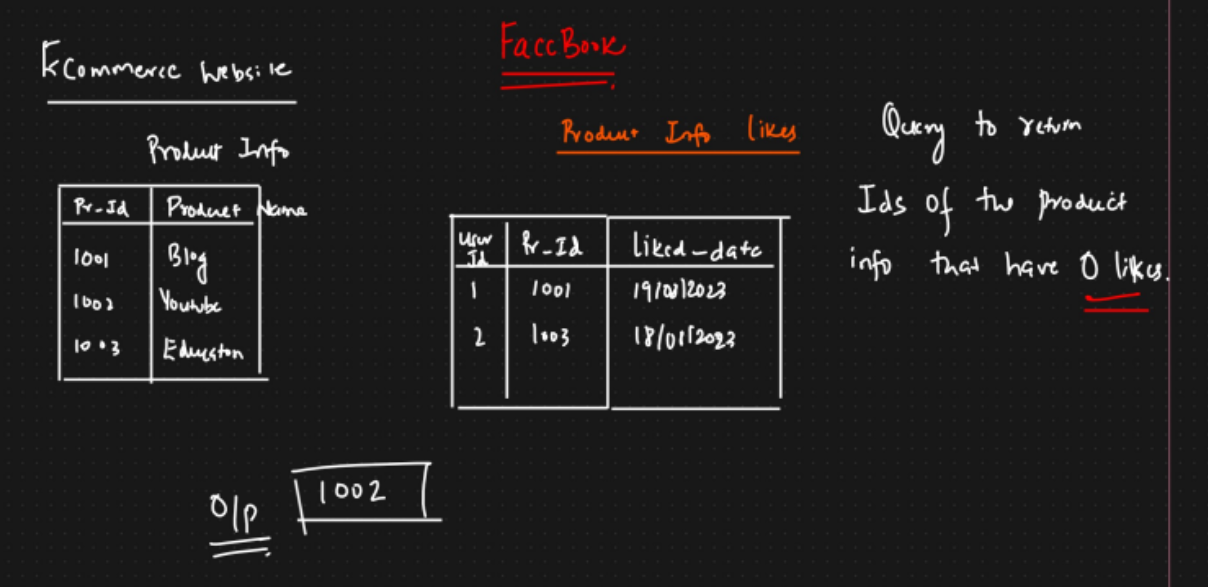

In [18]:


# Creating the product information table
cursor.execute('''

create table Product_info(
pr_id int(40),
product_name varchar(40)
)

''')

In [20]:
# Creating the product likes table 
cursor.execute('''

create table product_likes_info(
user_id int(10),
pr_id int(40),
liked_date varchar(255)
)

''')



In [21]:
# to check whether our product_info & product_likes_info tables are created or not
cursor.execute('show tables')

In [22]:
#fetching all tables
cursor.fetchall()

[('ai_tools',), ('product_info',), ('product_likes_info',)]

In [23]:
cursor.execute('''
insert into Product_info values(1001,'Blog'),
(1002,'Youtube'),
(1003,'Education')

'''
)

In [24]:
cursor.execute('select * from Product_info')

In [25]:
cursor.fetchall()

[(1001, 'Blog'), (1002, 'Youtube'), (1003, 'Education')]

In [26]:
cursor.execute('''
insert into Product_likes_info values(1,1001,'19/08/2023'),
(2,1003,'18/01/2023')
'''
)

In [32]:
mydb.commit()

In [30]:
cursor.execute('select * from product_likes_info')

In [31]:
cursor.fetchall()

[(1, 1001, '19/08/2023'), (2, 1003, '18/01/2023')]

In [33]:
# Question: Query to return IDs of the product info that have 0 likes
cursor.execute('''
select p.pr_id from product_info p
left join product_likes_info l
on p.pr_ID=l.pr_ID
where user_id is null
'''
)

In [34]:
cursor.fetchall()

[(1002,)]